# **Data exploration and analysis 

This sheet will help us to understand the process of feature selection till model selection to find the Beer mash extraction efficiency .i.e It is the extracting sugars from the grain during mash

**

In [ ]:
from google.colab import output
#output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!pip install lux-api
!pip install lux-widget

In [ ]:
import lux
import pandas as pd
import numpy as np


Load data

In [ ]:
data = pd.read_csv("new_beer_train.csv")


Variables

    Numerical
        Size(L): Amount brewed for recipe listed
        OG: Specific gravity of wort before fermentation
        FG: Specific gravity of wort after fermentation
        ABV: Alcohol By Volume
        IBU: International Bittering Units
        Color: Standard Reference Method. Light to dark. Ex. 40 = black
        BoilSize: Fluid at beginning of boil
        BoilTime: Time wort is boiled
        BoilGravity: Specific gravity of wort before the boil
        Efficiency: Beer mash extraction efficiency - extracting sugars from the grain during mash
        MashThickness: Amount of water per pound of grain
        PrimaryTemp: Temperature at the fermenting stage
        PitchRate: Yeast added to the fermentor per gravity unit - M cells/ml/deg P
    Categorical
        SugarScale: Scale to determine the concentration of dissolved solids in wort
        BrewMethod: Various techniques for brewing
        Style: Type of brew. VARIABLE A PREDECIR



# **Feature Selection**

### Check for null values 

In [ ]:
data.isna().sum()


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### To make plots using lux, you must first enable IPython's colab widget mode.

### plots of correlation ,distribution and Occurrence .

In [ ]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
data.describe()


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Also for the same set plot the heapman using different method 

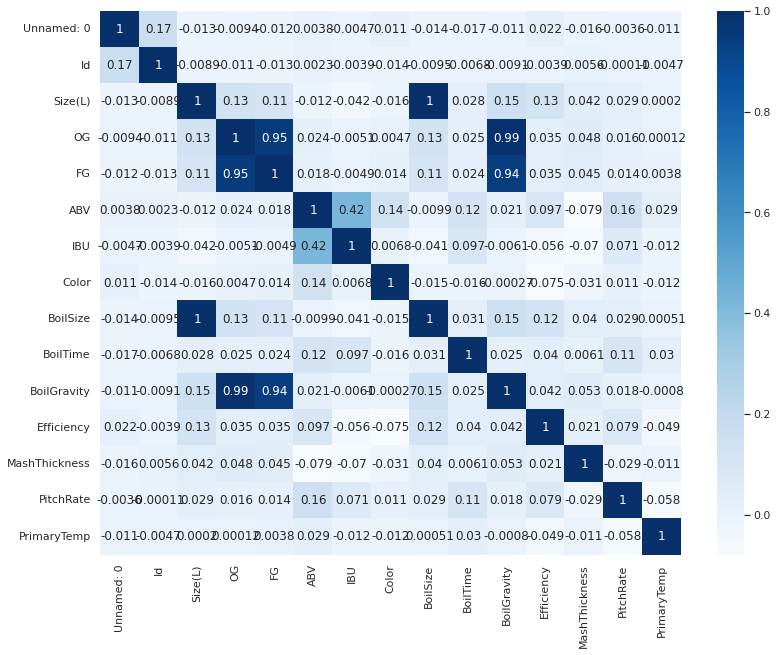

In [ ]:
import seaborn as sb

sb.set(rc={'figure.figsize':(13,10)})


corr = data.corr(method="pearson")  
sb.heatmap(corr, cmap="Blues", annot=True)





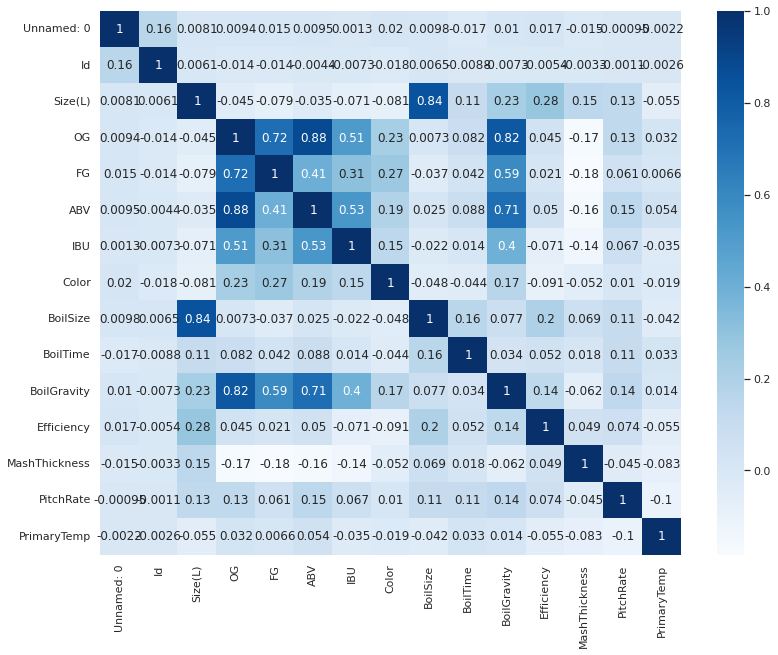

In [ ]:
corr = data.corr(method="spearman")  
sb.heatmap(corr, cmap="Blues", annot=True)


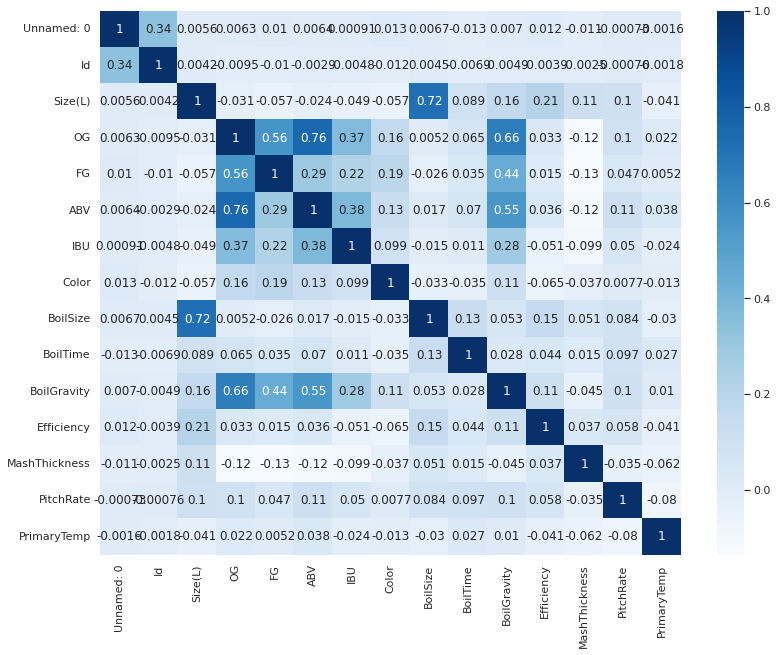

In [ ]:
corr = data.corr(method="kendall")  
sb.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
data.intent = ["Style","Efficiency"]
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
data.intent = ["SugarScale","Efficiency"]
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
from lux.vis.VisList import VisList
VisList(["Size(L)","BoilSize"],data)

LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

After plotting all the continuous and categorical variables.
Statistically, some of the features like 
OG-FG , 
size-boilsize
are highly correlated. Also, the categorical variables like SugarScale ,BrewMethod and style are not significantly adding value to the efficiency which can be droped.

 

In [ ]:
#data.columns
target_value = np.array(data['Efficiency'])
target_value  =np.reshape(target_value,(target_value.shape[0],1))
target_value.shape

(9099, 1)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Id', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color',
       'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness',
       'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp', 'Style'],
      dtype='object')

In [ ]:
data = data.drop(data.columns[[0, 1, 2,3,7,11,13,14,17]], axis=1)  # df.columns is zero-based pd.Index
data.columns

Index(['FG', 'ABV', 'IBU', 'BoilSize', 'BoilTime', 'BoilGravity',
       'MashThickness', 'PitchRate', 'PrimaryTemp'],
      dtype='object')

# **Normalization : Prepared data for model .**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(data))
target_value = scaler.fit_transform(target_value)


In [ ]:
print(data.shape)
print(target_value.shape)

(9099, 9)
(9099, 1)


### Generally we split the dataset into 2/3 set . One for trainning the model and others for validation the model .

In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, y_train, y_test = train_test_split( data, 
                          target_value, test_size=0.33, random_state=42,shuffle=True)

# **Model building**

# **1. xgboost**

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(train_dataset, y_train)
  
# Predict the model
pred_train = xgb_r.predict(train_dataset)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_train, pred_train))
print("RMSE : % f" %(rmse))


# Predict the model
pred_test = xgb_r.predict(test_dataset)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred_test))
print("RMSE : % f" %(rmse))
#print(pred)


RMSE :  0.102043
RMSE :  0.101575


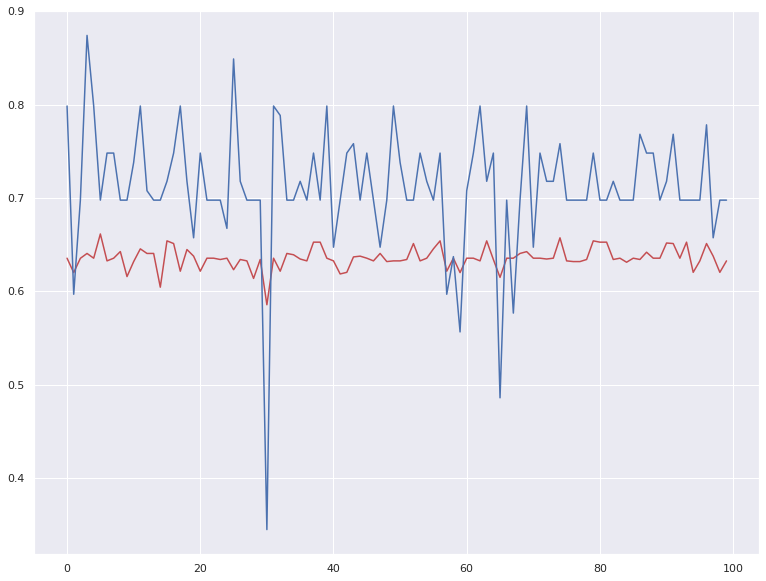

In [ ]:
from matplotlib import pyplot

pyplot.plot(pred_test[:100], color='r')
pyplot.plot(y_test[:100])
pyplot.show()


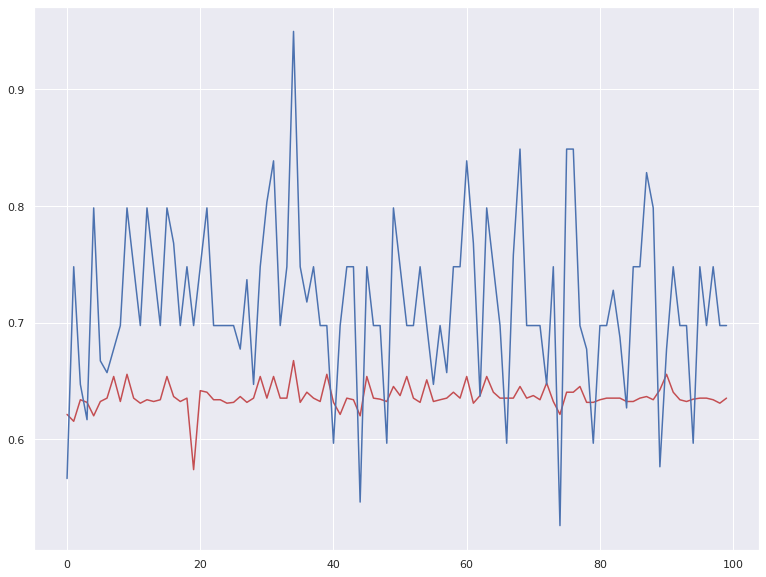

In [ ]:
from matplotlib import pyplot

pyplot.plot(pred_train[:100], color='r')
pyplot.plot(y_train[:100])
pyplot.show()

# **2. SVR**

<bound method RegressorMixin.score of SVR()>
0.08975219871702278
RMS-train :  0.074058
RMS-test :  0.072915


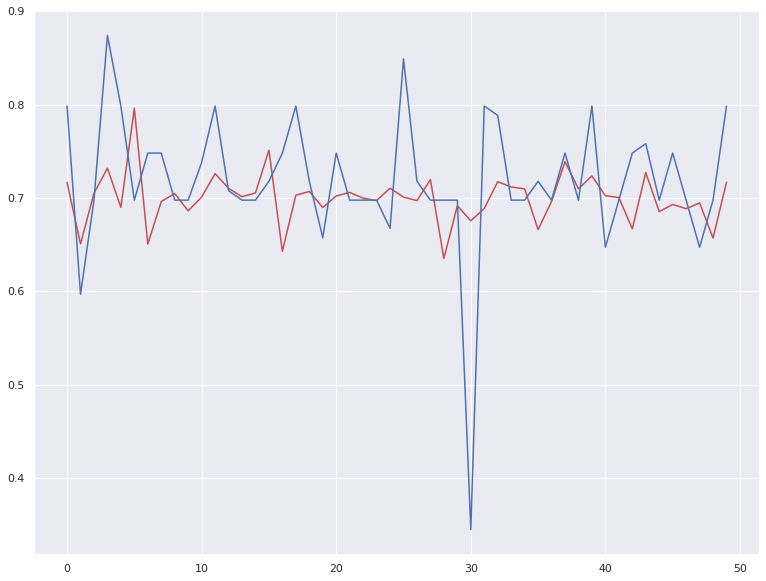

In [ ]:
from sklearn.svm import SVR
lineReg = SVR(kernel = 'rbf')#,max_iter=2500)#,C=1.0, epsilon=0.2)
target_train = np.reshape(y_train,(-1))

lineReg.fit(train_dataset, target_train)
print(lineReg.score)

ped = lineReg.predict(train_dataset )

print(lineReg.score(train_dataset, y_train ))

ped1 = lineReg.predict(test_dataset )

rmse = np.sqrt(MSE(y_train, ped))
print("RMS-train : % f" %(rmse))
#print(pred)
rmse = np.sqrt(MSE(y_test, ped1))
print("RMS-test : % f" %(rmse))

from matplotlib import pyplot
pyplot.plot(ped1[:50], color='r')
pyplot.plot(y_test[:50])
pyplot.show()


# **3. Why not Deep learning **

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf. __version__)

2.7.0


In [ ]:

def create_base_model(input_size):
  model = keras.Sequential([
      layers.Dense(64,activation='relu',input_shape=(input_size,)),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mse','mae'])
  return model

input_size = train_dataset.shape[1]
model = create_base_model(input_size)
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,809
Trainable params: 3,809
Non-trainable params: 0
_________________________________________________________________


**Model training and testing**

In [ ]:
history = model.fit(
    train_dataset,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split = 0.2
)

Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.2181 - mse: 0.2181 - mae: 0.3998 - val_loss: 0.0217 - val_mse: 0.0217 - val_mae: 0.1100
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0793 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0654
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0614 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0593
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0562 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0574
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0549 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0566
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0540 - val_loss: 0.0067 - val_mse: 0.0067 - val_mae: 0.0561
Epoch 7/20
39/39 [==========

In [ ]:
prediction_train = model.predict(train_dataset)
prediction_test = model.predict(test_dataset)

In [ ]:
# RMSE Computation
rmse = np.sqrt(MSE(y_train, prediction_train))
print("RMSE-train : % f" %(rmse))
#print(pred)
# RMSE Computation
rmse = np.sqrt(MSE(y_test, prediction_test))
print("RMS-test : % f" %(rmse))
#print(pred)

RMSE-train :  0.076050
RMS-test :  0.074572


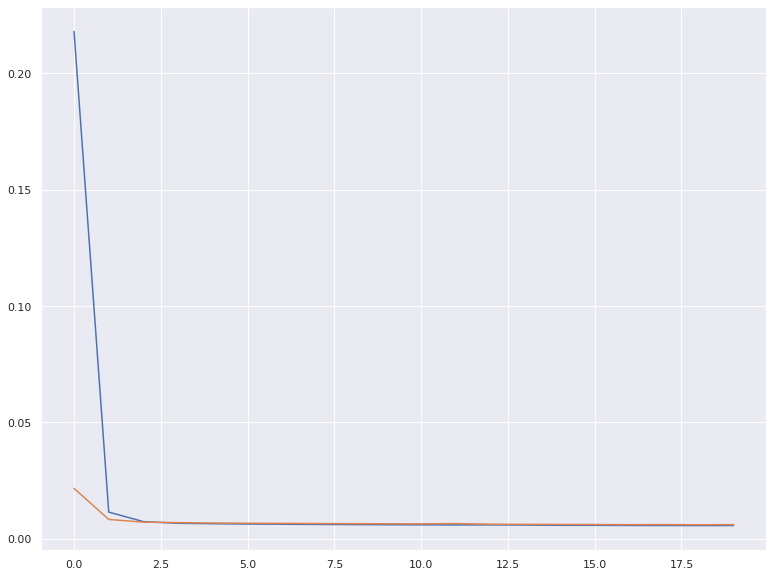

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.show()

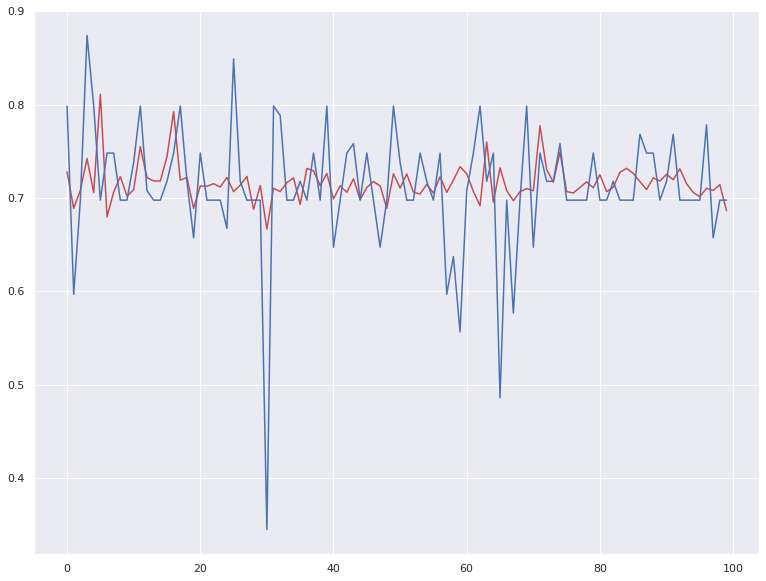

In [ ]:
from matplotlib import pyplot

pyplot.plot(prediction_test[:100], color='r')
pyplot.plot(y_test[:100])
pyplot.show()


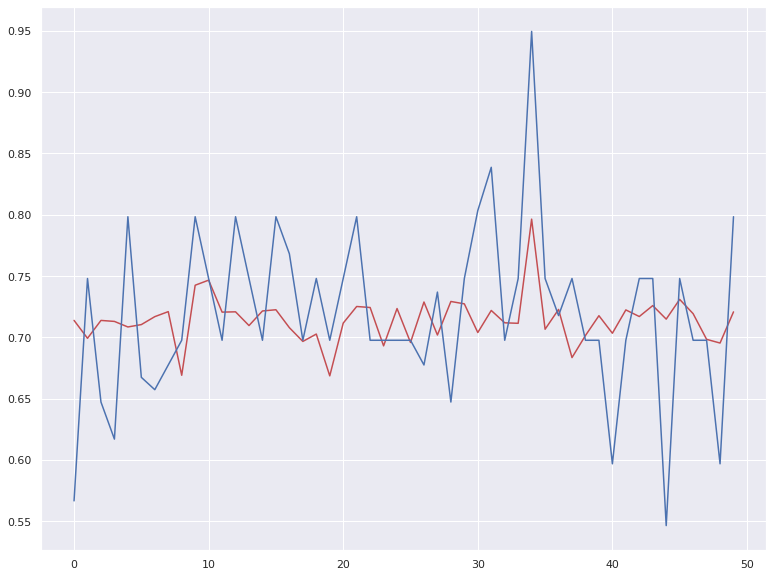

In [ ]:
from matplotlib import pyplot

pyplot.plot(prediction_train[:50], color='r')
pyplot.plot(y_train[:50])
pyplot.show()

In [ ]:
import seaborn as sb

sb.set(rc={'figure.figsize':(13,10)})

sb.countplot(prediction, color='royalblue')

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_dataset, y_train)
              
prediction = regressor.predict(train_dataset)



In [ ]:
prediction = regressor.predict(train_dataset)

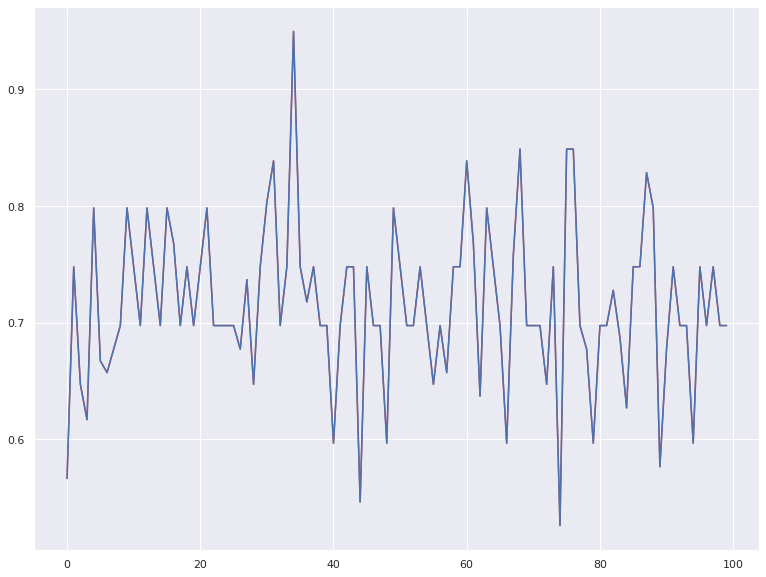

In [ ]:
from matplotlib import pyplot

pyplot.plot(prediction[:100], color='r')
pyplot.plot(y_train[:100])
pyplot.show()
